In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pymc as pm
from pymc.Matplot import plot as pmplot


sns.set()



In [2]:
country_name = 'Spain'
start_date = '2020-04-12'

forecast_df = pd.read_pickle('dead_forecast_{}_starting_{}.pkl'.format(country_name.replace(' ','_'),start_date))
forecast_df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
sample,,,,,,,,,,,,,,,,,,,,,
0,495.0,513.0,480.0,502.0,471.0,503.0,442.0,430.0,440.0,429.0,...,421.0,391.0,411.0,378.0,366.0,374.0,383.0,374.0,407.0,356.0
1,508.0,518.0,480.0,503.0,469.0,490.0,439.0,423.0,460.0,413.0,...,436.0,386.0,388.0,414.0,392.0,345.0,386.0,362.0,418.0,383.0
2,525.0,530.0,504.0,481.0,458.0,442.0,490.0,463.0,470.0,448.0,...,389.0,404.0,353.0,386.0,378.0,390.0,375.0,396.0,373.0,399.0
3,527.0,536.0,517.0,479.0,502.0,450.0,437.0,400.0,425.0,413.0,...,384.0,370.0,383.0,409.0,370.0,373.0,381.0,354.0,339.0,379.0
4,513.0,493.0,494.0,525.0,464.0,483.0,437.0,451.0,457.0,437.0,...,390.0,397.0,397.0,418.0,394.0,379.0,431.0,377.0,371.0,397.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,524.0,521.0,497.0,518.0,464.0,472.0,451.0,513.0,453.0,432.0,...,390.0,404.0,404.0,411.0,341.0,377.0,403.0,418.0,378.0,384.0
996,520.0,515.0,500.0,508.0,487.0,447.0,433.0,492.0,442.0,448.0,...,423.0,383.0,401.0,399.0,395.0,379.0,376.0,387.0,367.0,351.0
997,542.0,519.0,454.0,497.0,456.0,481.0,450.0,462.0,475.0,460.0,...,416.0,361.0,376.0,403.0,372.0,374.0,378.0,386.0,365.0,391.0


In [3]:
dick = pd.read_pickle('country_data.pkl')
US = pd.read_pickle('us_state_dict.pkl')
ny = US['New York']
ny = ny[['confirmed','deceased','inc','factor','dead_inc','dead_factor']]
dick['New York'] = ny
country = dick[country_name]
day_before = pd.to_datetime(start_date) - pd.Timedelta(days=1)
country = country.loc[day_before :]


country

,confirmed,factor,inc,deceased,dead_factor,dead_inc,pct_dead,conf_over_dead,dead_conf_ratio
2020-04-11,163027,1.030037,4754.0,16606,1.032647,525.0,10.186043,9.817355,1.002534
2020-04-12,166831,1.023334,3804.0,17209,1.036312,603.0,10.315229,9.694404,1.012683
2020-04-13,170099,1.019589,3268.0,17756,1.031786,547.0,10.438627,9.579804,1.011963
2020-04-14,172541,1.014356,2442.0,18056,1.016896,300.0,10.464759,9.555882,1.002503
2020-04-15,177644,1.029576,5103.0,18708,1.036110,652.0,10.531175,9.495617,1.006347
2020-04-16,184948,1.041116,7304.0,19315,1.032446,607.0,10.443476,9.575356,0.991672
2020-04-17,190839,1.031852,5891.0,20002,1.035568,687.0,10.481086,9.540996,1.003601
2020-04-18,191726,1.004648,887.0,20043,1.002050,41.0,10.453981,9.565734,0.997414
2020-04-19,198674,1.036239,6948.0,20453,1.020456,410.0,10.294754,9.713685,0.984769
2020-04-20,200210,1.007731,1536.0,20852,1.019508,399.0,10.415064,9.601477,1.011687


In [4]:
means = forecast_df.mean(axis=0)
CI_89 = np.percentile(forecast_df,[5.5,94.5],axis=0)
CI_89_low = CI_89[0,:]
CI_89_high = CI_89[1,:]


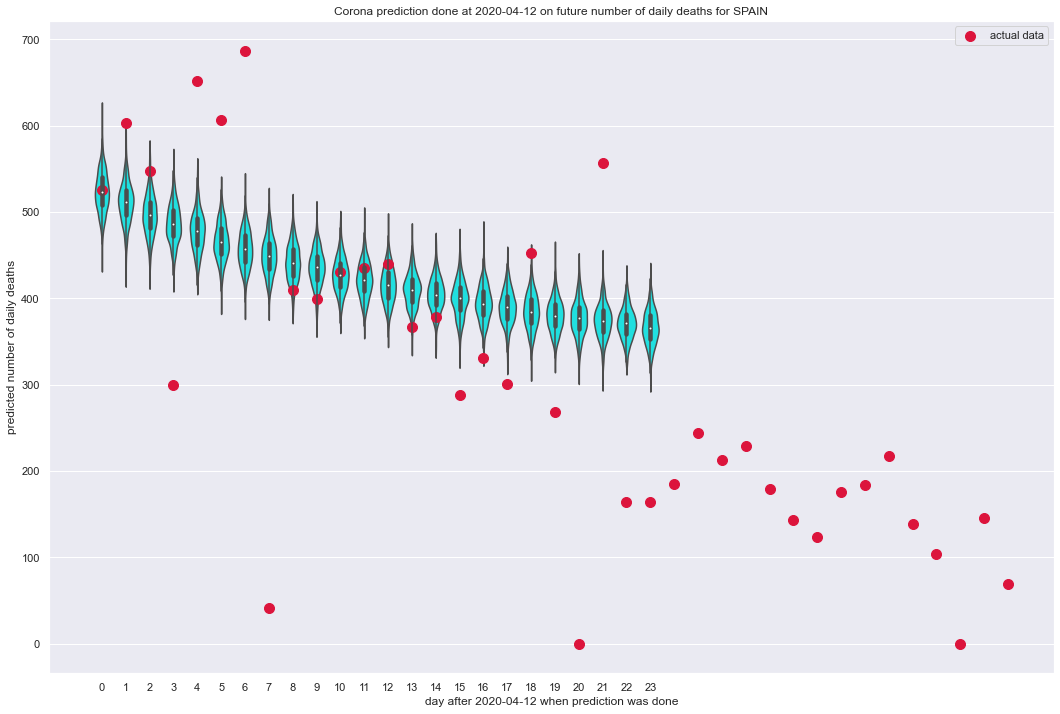

In [5]:
plt.figure(figsize=(18,12))
plt.title('Corona prediction done at {} on future number of daily deaths for {}'.format(
    start_date,country_name.upper()))
sns.violinplot(data=forecast_df,palette=['cyan'])
plt.scatter(range(len(country)), country['dead_inc'],color='crimson',s=100,label='actual data')
plt.xlabel('day after {} when prediction was done'.format(start_date))
plt.ylabel('predicted number of daily deaths')
plt.legend(loc='upper right')
plt.savefig('corona_check_prediction_{}.jpg'.format(country_name),format='jpg')

2020-04-11    525.0
2020-04-12    603.0
2020-04-13    547.0
2020-04-14    300.0
2020-04-15    652.0
2020-04-16    607.0
2020-04-17    687.0
2020-04-18     41.0
2020-04-19    410.0
2020-04-20    399.0
2020-04-21    430.0
2020-04-22    435.0
2020-04-23    440.0
2020-04-24    367.0
2020-04-25    378.0
2020-04-26    288.0
2020-04-27    331.0
2020-04-28    301.0
2020-04-29    453.0
2020-04-30    268.0
2020-05-01      0.0
2020-05-02    557.0
2020-05-03    164.0
2020-05-04    164.0
2020-05-05    185.0
2020-05-06    244.0
2020-05-07    213.0
2020-05-08    229.0
2020-05-09    179.0
2020-05-10    143.0
2020-05-11    123.0
2020-05-12    176.0
2020-05-13    184.0
2020-05-14    217.0
2020-05-15    138.0
2020-05-16    104.0
2020-05-17      0.0
2020-05-18    146.0
2020-05-19     69.0
Name: dead_inc, dtype: float64
range(0, 39)


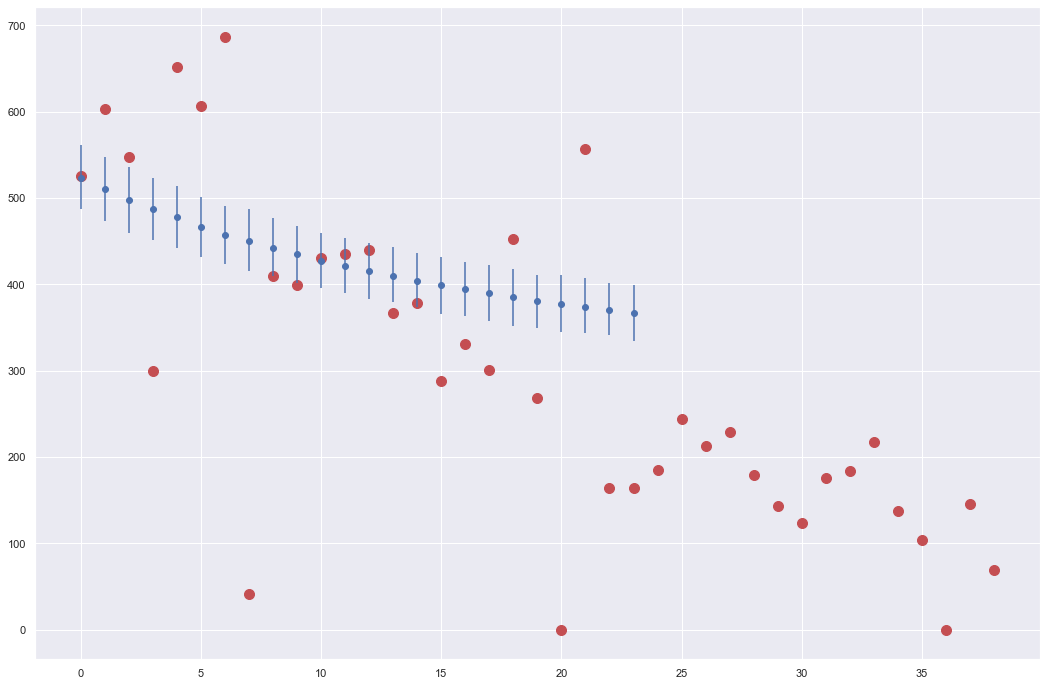

In [6]:
plt.figure(figsize=(18,12))
nr_points = len(country)
print (country['dead_inc'])
print (range(len(country)))
plt.errorbar(range(len(forecast_df.columns)),means,np.array((np.abs(means - CI_89_low),np.abs(means - CI_89_high))),fmt='o')
plt.scatter(range(len(country)), country['dead_inc'],color='r',s=100)